<h1> Import necessary libraries </h1>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

print("Finished!")

Finished!


<h1> Ingest + prep data </h1>

In [2]:
data =  pd.read_csv('One_Year_of_FitBitChargeHR_Data_2.csv')
data

,Date,Calories,Steps,Distance_in_meters,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity
0,9/5/2015,3.631,18.925,14.11,4,611.0,316,61,60,2.248
1,10/5/2015,3.204,14.228,10.57,1,602.0,226,14,77,1.719
2,11/5/2015,2.673,6.756,5.02,8,749.0,190,23,4,962.000
3,12/5/2015,2.495,5.020,3.73,1,876.0,171,0,0,736.000
4,13-05-2015,2.760,7.790,5.79,15,726.0,172,34,18,1.094
...,...,...,...,...,...,...,...,...,...,...
361,3/5/2016,3.796,18.588,14.13,16,599.0,275,49,79,2.360
362,4/5/2016,3.525,16.382,12.39,16,684.0,333,10,55,2.075
363,5/5/2016,3.649,21.913,16.40,19,701.0,287,29,90,2.249
364,6/5/2016,3.539,19.023,14.79,15,575.0,298,8,85,2.112


In [3]:
# Drop all except target columns
data_trim = data[['Calories', 'Steps', 'Distance_in_meters', 'floors', 'Minutes_of_intense_activity']]
data_trim

,Calories,Steps,Distance_in_meters,floors,Minutes_of_intense_activity
0,3.631,18.925,14.11,4,60
1,3.204,14.228,10.57,1,77
2,2.673,6.756,5.02,8,4
3,2.495,5.020,3.73,1,0
4,2.760,7.790,5.79,15,18
...,...,...,...,...,...
361,3.796,18.588,14.13,16,79
362,3.525,16.382,12.39,16,55
363,3.649,21.913,16.40,19,90
364,3.539,19.023,14.79,15,85


In [4]:
# Normalize all columns (put them on the same scale)
# Also called computing z-score
data_trim_norm = (data_trim - data_trim.mean())/data_trim.std()
data_trim_norm

,Calories,Steps,Distance_in_meters,floors,Minutes_of_intense_activity
0,1.469239,1.588157,1.634320,-0.750666,0.780196
1,0.407938,0.575743,0.589873,-1.040991,1.328714
2,-0.911853,-1.034808,-1.047607,-0.363567,-1.026685
3,-1.354268,-1.408994,-1.428210,-1.040991,-1.155748
4,-0.695616,-0.811934,-0.820425,0.313857,-0.574965
...,...,...,...,...,...
361,1.879343,1.515519,1.640221,0.410632,1.393245
362,1.205778,1.040027,1.126849,0.410632,0.618868
363,1.513978,2.232205,2.309965,0.700957,1.748168
364,1.240575,1.609281,1.834948,0.313857,1.586840


In [6]:
data_trim_norm['Steps'].max()

5.915220409027176

<h1> K-means clustering </h1>

In [7]:
# Decide on k: two methods

# Elbow method

# Calculate the distortion for each number of clusters (k)
# Distortion is the average of the squared distances of all points in a cluster from the centroid.
# Here, starting with k 1-10

distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_trim_norm)
    distortions.append(kmeanModel.inertia_)
    
# You can ignore the warning.

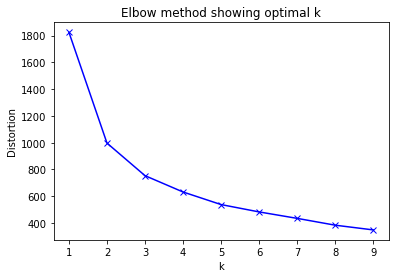

In [8]:
# Generate the elbow plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method showing optimal k')
plt.show()

# Where is the "elbow?"
# What would you do if you don't see an elbow?

In [9]:
# Silhouette method

# The silhouette method measures how dissimilar the points within a cluster are from the points in other clusters, 
# i.e. the distance between clusters.
# Want to maximize silhouette coefficient.

# Set up the k-means algorithm (don't need to change these values)
kmeans_kwargs = {"init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,}

In [10]:
# Create a list to hold the silhouette coefficients for each k
silhouette_coefficients = []

# Create a for loop to generate silhouette coefficient for k 2-6 [from elbow plot]
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_trim_norm)
    score = silhouette_score(data_trim_norm, kmeans.labels_)
    silhouette_coefficients.append(score)

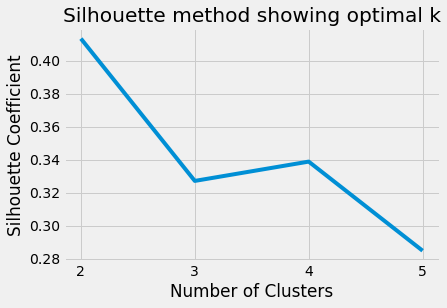

In [11]:
# Plot the silhouette coefficient against number of clusters; find the max
plt.style.use("fivethirtyeight")
plt.plot(range(2, 6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette method showing optimal k')
plt.show()

In [12]:
# Generate clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_trim_norm)
output_kmeans = kmeans.predict(data_trim_norm)
output_kmeans

array([2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 3, 3, 3, 2, 3,
       3, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [13]:
output_kmeans.max()

3

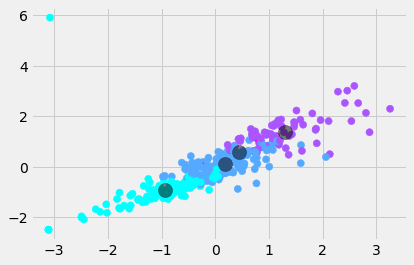

In [14]:
# Plot the clusters
plt.scatter(data_trim_norm.iloc[:, 0], data_trim_norm.iloc[:, 1], c=output_kmeans, s=50, cmap='cool')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [15]:
#We notice that there is an extreme outlier of 19 on the Y axis, as of now i am currently unsure why the data shows the outlier 
#even though the array itself shows the maximum is 3 

In [16]:
# Add the cluster number as a new column in your *original* data frame
data['cluster'] = pd.Series(output_kmeans, index=data.index)
data

,Date,Calories,Steps,Distance_in_meters,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity,cluster
0,9/5/2015,3.631,18.925,14.11,4,611.0,316,61,60,2.248,2
1,10/5/2015,3.204,14.228,10.57,1,602.0,226,14,77,1.719,1
2,11/5/2015,2.673,6.756,5.02,8,749.0,190,23,4,962.000,0
3,12/5/2015,2.495,5.020,3.73,1,876.0,171,0,0,736.000,0
4,13-05-2015,2.760,7.790,5.79,15,726.0,172,34,18,1.094,0
...,...,...,...,...,...,...,...,...,...,...,...
361,3/5/2016,3.796,18.588,14.13,16,599.0,275,49,79,2.360,2
362,4/5/2016,3.525,16.382,12.39,16,684.0,333,10,55,2.075,2
363,5/5/2016,3.649,21.913,16.40,19,701.0,287,29,90,2.249,2
364,6/5/2016,3.539,19.023,14.79,15,575.0,298,8,85,2.112,2


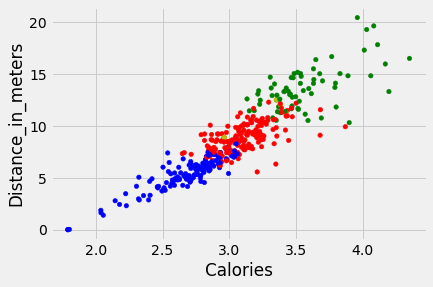

In [17]:
# Plotting example: age versus diagnosis versus cluster
color = data.cluster.map({0:'b', 1:'r', 2:'g', 3:'y'})
data.plot.scatter(x = 'Calories', y = 'Distance_in_meters', c = color)

In [18]:
# Use exploratory data analysis techniques to explore differences between clusters
cluster_0 = pd.DataFrame(data[data.cluster == 0].describe()) # cluster 0
cluster_0

,Calories,Steps,Distance_in_meters,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity,cluster
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,2.659539,7.374008,5.263906,6.421875,508.819687,205.781250,15.781250,9.187500,229.817305,0.0
std,0.267777,3.517467,1.641356,5.765236,362.845074,90.521493,17.248046,10.925481,356.424458,0.0
min,1.789000,0.000000,0.000000,0.000000,1.042000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.555750,6.254500,4.627500,1.000000,1.285750,145.750000,0.000000,0.000000,1.146000,0.0
50%,2.711500,7.440000,5.500000,6.000000,673.500000,205.500000,10.000000,4.000000,1.322000,0.0
75%,2.824250,8.522750,6.315000,11.000000,786.000000,270.750000,27.250000,15.250000,588.250000,0.0
max,3.061000,39.000000,8.290000,22.000000,998.000000,414.000000,75.000000,50.000000,983.000000,0.0
